In [56]:
## Libraries
import glob
from multiprocessing import cpu_count
import os
import sys

## 3rd party
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
import torch
from torch.utils.data import DataLoader

_path = ".."
if _path not in sys.path:
    sys.path.append(_path)
from lib.dataset import TextArtDataLoader, AlignCollate
from lib.config import Config
# from lib.preprocess import (pad_image, crop_edges_lr, )

%reload_ext autoreload
%autoreload 2

In [35]:
WORD2VEC_MODEL_FILE = "../models/deviant_wiki_word2vec.model"
BATCH_SIZE = 4
# N_WORKERS = cpu_count() - 1
N_WORKERS = 1
CONFIG = Config()

In [36]:
train_dataset = TextArtDataLoader(['wikiart', 'deviantart'], WORD2VEC_MODEL_FILE, mode='train')
train_align_collate = AlignCollate('train',
                                   CONFIG.MEAN,
                                   CONFIG.STD,
                                   CONFIG.IMAGE_SIZE_HEIGHT,
                                   CONFIG.IMAGE_SIZE_WIDTH,
                                   horizontal_flipping=CONFIG.HORIZONTAL_FLIPPING,
                                   random_rotation=CONFIG.RANDOM_ROTATION,
                                   color_jittering=CONFIG.COLOR_JITTERING,
                                   random_grayscale=CONFIG.RANDOM_GRAYSCALE,
                                   random_channel_swapping=CONFIG.RANDOM_CHANNEL_SWAPPING,
                                   random_gamma=CONFIG.RANDOM_GAMMA,
                                   random_resolution=CONFIG.RANDOM_RESOLUTION)

train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=N_WORKERS,
                          pin_memory=True,
                          collate_fn=train_align_collate,
                         )

In [12]:
train_dataset[0][1]

tensor([[-8.8240e-02, -9.8872e-02, -1.8374e-01,  ..., -1.4571e-04,
          2.6842e-02, -7.4910e-02],
        [-3.4046e-02, -5.9622e-03,  1.7901e-01,  ...,  8.5811e-02,
          1.6756e-01,  2.8669e-01],
        [-2.2918e-01,  2.0970e-01, -2.4397e-01,  ..., -1.8154e-01,
          2.7347e-01, -1.7227e-01],
        [-7.2069e-02,  2.3292e-02,  8.6588e-03,  ..., -7.4428e-02,
         -7.1368e-02, -2.0730e-02],
        [-1.6651e-01,  9.0724e-02, -1.2495e-01,  ..., -2.6451e-01,
         -9.3857e-02, -1.0939e-01]])

In [76]:
# for image, label, image_file in train_loader:
# for label_sentence, image_file in train_loader:
for image, word_vectors_tensor in train_loader:
#     print(label_sentence, image_file)
    print("IMAGE:", image.shape)
    print("WV:", word_vectors_tensor.shape)
    break

IMAGE: torch.Size([4, 3, 72, 192])
WV: torch.Size([4, 5, 2000])


In [77]:
img = np.array(image)[0].transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


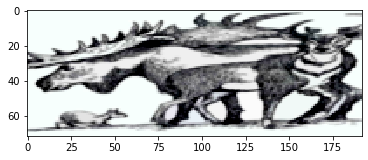

In [78]:
plt.imshow(img)

In [ ]:
a = torch.Tensor([[-8, -9, -1], 
                  [-1, 2, -7]])
b = torch.Tensor([[-8, -9, -1], 
                  [-1, 2, -7],
                  [1, 2, 7],
                  [-3, 2, 2],
                  [5, 5, 3]])

In [ ]:
a

In [ ]:
b

In [ ]:
torch.Tensor(np.pad(b, ((0, len(b) - len(b)), (0, 0))))